In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/DATA SCIENCE & ANALYSIS/6-E-Commerce Behavior Analytics")

In [5]:
os.listdir()

['ecommerce_customer_churn_dataset.csv', 'E-Commerce  BehaviorAnalytics.ipynb']

In [6]:
ECommerce_df = pd.read_csv("ecommerce_customer_churn_dataset.csv")

**Link Dataset:**

https://www.kaggle.com/datasets/dhairyajeetsingh/ecommerce-customer-behavior-dataset

**Dataset Description:**
 1. Age: Customer's age in years (numerical)                   
 2. Gender: Customer's gender (Male/Female)                         
 3. Country: Country of customer residence                        
 4. City: City where the customer is located                           
 5. Membership_Years: Number of years the customer has been a member of the platform               
 6. Login_Frequency: Average number of logins per month                
 7. Session_Duration_Avg: Average session duration in minutes          
 8. Pages_Per_Session: Average pages viewed per session              
 9. Cart_Abandonment_Rate: Percentage of abandoned shopping carts          
 10. Wishlist_Items: Number of items in customer's wishlist                 
 11. Total_Purchases: Total number of purchases made                
 12. Average_Order_Value: Average value per order in currency units            
 13. Days_Since_Last_Purchase: Number of days since most recent purchase       
 14. Discount_Usage_Rate: Percentage of purchases using discounts            
 15. Returns_Rate: Percentage of items returned                   
 16. Email_Open_Rate: Percentage of marketing emails opened                
 17. Customer_Service_Calls: Number of customer service calls made by the customer        
 18. Product_Reviews_Written: Number of product reviews submitted        
 19. Social_Media_Engagement_Score: Social media interaction score (0-100)  
 20. Mobile_App_Usage: Percentage of activity via mobile app               
 21. Payment_Method_Diversity: Number of different payment methods used       
 22. Lifetime_Value: Total customer lifetime value in currency units                 
 23. Credit_Balance: Current account credit balance                 
 24. Churned: Target variable - whether customer has churned (0=Active, 1=Churned)                         
 25. Signup_Quarter: Quarter when customer signed up (Q1-Q4)

In [7]:
ECommerce_df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [8]:
ECommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [9]:
ECommerce_df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


Based on the descriptive statistical analysis, several data quality issues and initial observations were identified:

1. Age Variable: The maximum value of the Age variable reaches 200, which is not realistic and may indicate outliers or invalid data.
2. From the descriptive analysis, I found an inconsistency where Login_Frequency is zero but Session_Duration_Avg and Pages_Per_Session are still greater than zero. I assumed that this indicates user activity without explicit login
3. Cart_Abandonment_Rate: Although Cart_Abandonment_Rate is defined as a percentage, values greater than 100 were observed. This suggests a discrepancy that requires further analysis to understand how this variable was calculated or whether data quality issues are present.
4. Total_Purchases: The minimum value of Total_Purchases is -13.
5. Returns and Total_Purchases: Further analysis is needed to check whether negative values in Total_Purchases are related to product returns or order cancellations.
6. Average_Order_Value and Total_Purchases: An exploratory analysis will be conducted to examine the relationship between Average_Order_Value and Total_Purchases, especially in cases where the number of purchases is low or zero, which may lead to missing or inconsistent values.
7. Lifetime_Value Consistency: Additional checks will be performed to verify whether Lifetime_Value is zero when Total_Purchases is zero or negative, in order to ensure logical consistency between purchase activity and total customer value.

In [10]:
# Count the number of rows where age is greater than 100
ECommerce_df[ECommerce_df["Age"] > 100]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
6715,150.0,Male,Australia,Adelaide,5.7,24.0,50.1,11.3,27.3,10.0,...,48.7,1.0,6.0,88.2,38.6,2.0,3323.73,4076.0,0,Q2
8809,200.0,Female,USA,New York,2.1,9.0,27.6,3.1,57.5,1.0,...,3.5,6.0,1.0,36.0,11.3,4.0,662.87,1170.0,0,Q2
12960,150.0,Female,USA,Chicago,6.1,26.0,45.5,16.4,29.2,11.0,...,30.3,2.0,4.0,41.4,36.9,2.0,1552.92,2132.0,0,Q3
16924,150.0,Male,India,Chennai,6.2,18.0,28.6,5.4,74.8,3.0,...,10.5,6.0,0.0,0.0,6.0,2.0,1641.22,0.0,0,Q3
17932,150.0,Female,Japan,Nagoya,1.7,5.0,NaN,4.0,61.1,4.0,...,22.4,7.0,4.0,54.3,21.5,1.0,1714.97,1616.0,0,Q2
18348,200.0,Male,Japan,Tokyo,3.9,12.0,22.0,4.4,84.2,2.0,...,1.0,5.0,3.0,22.1,NaN,2.0,381.98,1292.0,0,Q1
22233,200.0,Male,USA,Phoenix,1.8,17.0,36.0,9.1,38.6,7.0,...,45.5,5.0,2.0,NaN,27.8,1.0,1847.83,2242.0,0,Q3
23572,200.0,Male,Australia,Adelaide,6.1,4.0,18.4,5.4,69.6,3.0,...,17.3,5.0,2.0,41.7,10.1,1.0,1247.82,404.0,0,Q1
24876,200.0,Male,India,Chennai,1.8,0.0,19.4,6.0,55.8,4.0,...,2.7,8.0,NaN,34.9,7.0,2.0,770.31,942.0,0,Q4
34447,200.0,Female,USA,Los Angeles,2.2,3.0,18.7,6.6,58.1,1.0,...,29.6,7.0,3.0,42.0,4.8,1.0,764.30,755.0,0,Q4


In [11]:
# Drop rows with invalid age values
ECommerce_df = ECommerce_df.drop(
    ECommerce_df[ECommerce_df["Age"] > 100].index
)

The Age variable shows unrealistic values exceeding 100, with extreme outliers at 150 and 200. Since human ages above 100 are highly unlikely in this context, these records were treated as invalid and removed.

In [12]:
ECommerce_df[ECommerce_df["Age"].isna()]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
26,NaN,Female,Japan,Nagoya,1.3,17.0,18.9,8.6,61.1,7.0,...,18.3,2.0,4.0,25.4,19.0,4.0,684.73,1735.0,0,Q4
43,NaN,Male,France,Toulouse,2.7,17.0,30.4,9.8,41.5,11.0,...,20.7,4.0,3.0,45.2,21.7,2.0,1294.69,2254.0,0,Q3
53,NaN,Male,Australia,Melbourne,1.4,0.0,29.2,6.8,52.1,4.0,...,20.6,2.0,1.0,54.2,19.8,2.0,486.60,1416.0,0,Q3
57,NaN,Female,Germany,Munich,2.1,10.0,39.6,8.9,38.9,5.0,...,32.0,4.0,1.0,51.3,16.0,2.0,2779.71,2268.0,0,Q1
60,NaN,Male,Japan,Osaka,6.3,24.0,41.4,NaN,48.1,NaN,...,24.7,5.0,4.0,43.3,39.5,4.0,1458.06,NaN,0,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,NaN,Female,USA,Houston,5.4,17.0,29.0,8.4,54.5,6.0,...,42.2,7.0,6.0,28.6,NaN,3.0,781.52,2587.0,0,Q1
49892,NaN,Male,USA,Los Angeles,5.4,15.0,44.0,11.4,42.8,7.0,...,40.0,5.0,6.0,51.0,21.6,1.0,1862.91,2530.0,0,Q1
49908,NaN,Male,Germany,Hamburg,2.5,22.0,35.9,12.1,41.0,5.0,...,34.1,2.0,NaN,35.5,NaN,2.0,1650.48,2028.0,0,Q1
49960,NaN,Male,Australia,Brisbane,5.1,8.0,21.5,4.3,57.6,NaN,...,27.2,6.0,1.0,3.6,NaN,2.0,1440.38,1011.0,0,Q1


In [13]:
# Fill missing values in the Age column using the median
age_median = ECommerce_df["Age"].median()
ECommerce_df["Age"] = ECommerce_df["Age"].fillna(age_median)

The Age variable contains 2,495 missing values (approximately 5% of the dataset). To preserve the dataset size while maintaining a realistic age distribution, missing values were imputed using the median age.

In [14]:
# Remove all rows where Total_Purchases is negative
ECommerce_df = ECommerce_df[ECommerce_df["Total_Purchases"] >= 0]

In [15]:
ECommerce_df[ECommerce_df["Session_Duration_Avg"].isna()]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
8,32.0,Male,Canada,Calgary,1.3,14.0,NaN,7.4,66.5,4.0,...,19.0,2.0,0.0,0.0,18.7,2.0,537.21,534.0,0,Q1
125,64.0,Male,Japan,Tokyo,2.6,5.0,NaN,2.1,77.3,0.0,...,12.7,1.0,0.0,0.0,6.7,2.0,443.82,1105.0,0,Q3
162,51.0,Male,Canada,Calgary,2.7,2.0,NaN,5.0,61.0,6.0,...,12.2,5.0,4.0,22.9,7.4,2.0,1629.95,NaN,0,Q1
182,25.0,Male,India,Mumbai,2.5,20.0,NaN,10.3,61.8,8.0,...,24.3,4.0,5.0,35.5,21.5,2.0,1057.99,NaN,0,Q3
197,39.0,Male,Australia,Melbourne,4.1,9.0,NaN,5.5,74.6,1.0,...,15.2,8.0,3.0,6.7,20.0,2.0,1317.36,571.0,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,48.0,Female,France,Lyon,0.7,7.0,NaN,6.3,62.3,3.0,...,20.3,7.0,3.0,38.6,28.8,2.0,895.12,1014.0,0,Q1
49917,62.0,Female,USA,Houston,2.0,0.0,NaN,3.8,72.6,NaN,...,11.6,9.0,2.0,9.4,12.1,2.0,540.74,NaN,1,Q1
49918,55.0,Male,USA,Houston,2.7,7.0,NaN,7.3,81.4,0.0,...,13.2,10.0,0.0,18.5,11.2,4.0,544.27,2287.0,1,Q1
49973,22.0,Female,Australia,Adelaide,2.8,10.0,NaN,4.0,78.9,0.0,...,20.6,11.0,0.0,25.5,7.1,3.0,458.36,NaN,1,Q3


In [16]:
#Show rows with NaN Session_Duration_Avg sorted by Login_Frequency
ECommerce_df[ECommerce_df["Session_Duration_Avg"].isna()].sort_values(by = "Login_Frequency", ascending = True)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
614,67.0,Female,UK,Glasgow,4.1,0.0,NaN,3.3,71.4,2.0,...,12.3,10.0,1.0,7.1,12.9,1.0,817.76,2463.0,1,Q2
501,60.0,Female,Australia,Melbourne,2.1,0.0,NaN,4.5,65.3,1.0,...,12.2,12.0,2.0,0.0,0.0,3.0,1050.95,1290.0,0,Q3
49262,25.0,Female,Germany,Hamburg,2.1,0.0,NaN,3.8,72.1,2.0,...,10.3,5.0,1.0,0.0,10.7,3.0,246.50,0.0,0,Q4
49225,39.0,Female,Canada,Montreal,4.4,0.0,NaN,3.8,85.7,0.0,...,6.3,7.0,0.0,9.3,8.3,5.0,408.26,467.0,1,Q4
345,40.0,Male,USA,New York,1.3,0.0,NaN,1.9,74.0,0.0,...,5.4,2.0,1.0,3.7,7.1,5.0,270.62,1751.0,1,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46829,47.0,Female,USA,Chicago,7.6,26.0,NaN,9.8,60.4,2.0,...,41.6,10.0,4.0,42.6,24.7,2.0,3133.65,2349.0,1,Q1
35219,37.0,Female,USA,New York,1.1,27.0,NaN,10.2,77.0,6.0,...,17.3,6.0,7.0,43.4,29.7,3.0,1539.17,2234.0,0,Q3
22588,39.0,Male,USA,New York,4.2,28.0,NaN,11.6,69.5,3.0,...,22.4,2.0,6.0,44.1,23.9,2.0,2343.86,NaN,0,Q1
20934,36.0,Male,France,Lyon,4.4,28.0,NaN,NaN,60.1,3.0,...,29.6,5.0,6.0,NaN,NaN,1.0,1848.78,2398.0,1,Q2


In [17]:
# Replace NaN in Session_Duration_Avg with 0 when Login_Frequency is 0
ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] == 0) &
    (ECommerce_df["Session_Duration_Avg"].isna()),
    "Session_Duration_Avg"
] = 0

# Replace NaN in Session_Duration_Avg with median when Login_Frequency is more than 0
median_session = ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] > 0),
    "Session_Duration_Avg"
].median()

ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] > 0) &
    (ECommerce_df["Session_Duration_Avg"].isna()),
    "Session_Duration_Avg"
] = median_session

Missing values in Session_Duration_Avg were handled conditionally based on login activity. For users with zero login frequency, missing session duration values were set to zero to represent inactivity. For users with non-zero login frequency, missing values were imputed using the median session duration of active users to account for missing records.

In [18]:
ECommerce_df[ECommerce_df["Pages_Per_Session"].isna()].sort_values(by = "Login_Frequency", ascending = True)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
24604,36.0,Male,France,Marseille,2.1,0.0,17.6,NaN,60.5,2.0,...,24.0,9.0,3.0,31.5,18.8,1.0,1624.51,NaN,0,Q1
22035,39.0,Male,India,Mumbai,4.5,0.0,11.0,NaN,91.3,0.0,...,9.1,11.0,3.0,28.2,7.7,1.0,266.54,2203.0,1,Q3
22200,34.0,Male,UK,Manchester,5.0,0.0,27.2,NaN,73.7,3.0,...,17.7,10.0,1.0,50.9,NaN,3.0,948.46,2679.0,0,Q4
21782,26.0,Female,France,Lyon,0.9,0.0,14.3,NaN,68.9,2.0,...,1.2,4.0,1.0,16.3,15.9,2.0,275.57,0.0,0,Q3
3011,53.0,Female,USA,Phoenix,3.2,0.0,3.8,NaN,70.0,0.0,...,10.3,8.0,0.0,0.0,11.3,2.0,851.78,1132.0,1,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28829,31.0,Male,India,Chennai,10.0,38.0,59.7,NaN,14.4,15.0,...,71.1,0.0,NaN,81.9,55.6,2.0,3022.89,4695.0,0,Q4
31048,48.0,Female,Germany,Frankfurt,0.6,39.0,50.9,NaN,32.0,12.0,...,49.2,3.0,NaN,57.7,42.3,3.0,2303.44,4174.0,0,Q1
20265,42.0,Female,Japan,Nagoya,5.4,40.0,58.9,NaN,27.3,11.0,...,48.7,0.0,10.0,68.2,39.8,1.0,2043.81,3248.0,0,Q2
35433,40.0,Male,France,Lyon,2.8,40.0,44.9,NaN,46.6,9.0,...,41.7,3.0,7.0,NaN,NaN,3.0,3067.06,3274.0,0,Q4


In [19]:
# Replace NaN in Pages_Per_Session with 0 when Login_Frequency is 0
ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] == 0) &
    (ECommerce_df["Pages_Per_Session"].isna()),
    "Pages_Per_Session"
] = 0

# Replace NaN in Pages_Per_Session with median when Login_Frequency is more than 0
median_pages_session = ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] > 0),
    "Pages_Per_Session"
].median()

ECommerce_df.loc[
    (ECommerce_df["Login_Frequency"] > 0) &
    (ECommerce_df["Pages_Per_Session"].isna()),
    "Pages_Per_Session"
] = median_pages_session

In [20]:
ECommerce_df[ECommerce_df["Wishlist_Items"].isna()]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
21,35.0,Male,USA,New York,4.7,6.0,14.4,6.5,80.9,NaN,...,19.9,8.0,1.0,3.3,2.9,1.0,644.58,NaN,1,Q4
31,60.0,Female,Germany,Hamburg,4.9,27.0,45.6,8.8,35.1,NaN,...,57.8,3.0,6.0,NaN,42.7,3.0,1633.16,NaN,0,Q2
36,40.0,Male,USA,Phoenix,1.5,24.0,31.7,17.0,50.0,NaN,...,26.3,5.0,6.0,80.9,20.1,4.0,2433.74,427.0,0,Q1
60,37.0,Male,Japan,Osaka,6.3,24.0,41.4,8.8,48.1,NaN,...,24.7,5.0,4.0,43.3,39.5,4.0,1458.06,NaN,0,Q3
84,28.0,Male,UK,London,0.2,31.0,37.3,16.7,32.0,NaN,...,32.0,7.0,6.0,52.2,32.5,3.0,2308.95,1834.0,1,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49940,31.0,Male,Canada,Calgary,5.0,7.0,20.9,10.0,54.5,NaN,...,0.0,6.0,2.0,23.9,17.5,2.0,821.49,1616.0,0,Q4
49949,34.0,Male,Germany,Hamburg,4.4,21.0,53.1,12.7,32.6,NaN,...,33.3,0.0,9.0,81.1,32.9,2.0,1849.40,2525.0,1,Q3
49960,37.0,Male,Australia,Brisbane,5.1,8.0,21.5,4.3,57.6,NaN,...,27.2,6.0,1.0,3.6,NaN,2.0,1440.38,1011.0,0,Q1
49964,42.0,Male,UK,London,3.3,16.0,34.0,8.6,51.3,NaN,...,32.8,2.0,2.0,42.6,NaN,1.0,1198.43,2398.0,0,Q1


In [21]:
ECommerce_df["Wishlist_Items"] = ECommerce_df["Wishlist_Items"].fillna(0)

Missing values in Wishlist_Items were imputed with zero, assuming that missing values indicate users who did not add any items to their wishlist.

In [22]:
ECommerce_df[ECommerce_df["Days_Since_Last_Purchase"].isna()]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
73,56.0,Male,India,Chennai,2.6,6.0,22.9,5.9,62.8,2.0,...,29.2,7.0,4.0,45.5,6.8,3.0,619.33,2499.0,0,Q4
88,31.0,Female,USA,Chicago,1.2,32.0,37.1,14.8,46.3,5.0,...,32.6,5.0,5.0,NaN,NaN,3.0,2893.20,2134.0,0,Q2
100,21.0,Male,USA,New York,1.5,0.0,11.6,5.4,80.8,3.0,...,2.2,4.0,1.0,28.6,18.6,2.0,1212.35,1015.0,0,Q2
102,33.0,Male,USA,Los Angeles,6.6,27.0,48.5,13.5,54.8,7.0,...,30.7,3.0,6.0,14.8,23.2,1.0,2159.92,4225.0,0,Q2
124,45.0,Male,USA,Houston,2.3,28.0,45.7,15.8,23.4,11.0,...,41.8,3.0,8.0,51.5,29.9,2.0,4964.67,2231.0,0,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49914,31.0,Male,USA,New York,1.3,21.0,31.8,8.1,54.0,3.0,...,16.4,3.0,2.0,47.9,18.5,3.0,993.42,3089.0,0,Q2
49927,58.0,Male,Germany,Berlin,0.5,16.0,42.8,15.7,37.8,3.0,...,36.8,5.0,3.0,51.7,29.1,2.0,1350.30,3044.0,0,Q2
49936,38.0,Male,Australia,Perth,4.9,6.0,21.5,5.1,67.9,1.0,...,4.3,5.0,0.0,NaN,11.3,3.0,584.14,512.0,0,Q4
49949,34.0,Male,Germany,Hamburg,4.4,21.0,53.1,12.7,32.6,0.0,...,33.3,0.0,9.0,81.1,32.9,2.0,1849.40,2525.0,1,Q3


In [23]:
ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] == 0) &
    (ECommerce_df["Days_Since_Last_Purchase"].isna()),
    "Days_Since_Last_Purchase"
] = 0

median_last_purchase = ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] > 0),
    "Days_Since_Last_Purchase"
].median()

ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] > 0) &
    (ECommerce_df["Days_Since_Last_Purchase"].isna()),
    "Days_Since_Last_Purchase"
] = median_last_purchase

In [24]:
ECommerce_df[ECommerce_df["Discount_Usage_Rate"].isna()].sort_values(by = "Total_Purchases", ascending = True)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
32581,33.0,Female,UK,London,1.800000,2.0,9.8,2.6,89.6,0.0,...,0.0,7.0,0.0,0.0,9.4,1.0,0.00,0.0,1,Q3
40098,25.0,Male,Canada,Montreal,5.500000,0.0,9.4,4.1,73.4,0.0,...,2.7,10.0,0.0,0.0,9.7,1.0,0.00,798.0,1,Q4
32074,31.0,Male,UK,Manchester,1.500000,0.0,0.0,3.7,68.0,1.0,...,12.0,7.0,0.0,5.4,NaN,4.0,72.85,0.0,1,Q2
7387,41.0,Male,Canada,Vancouver,1.000000,0.0,0.0,3.3,65.0,1.0,...,5.2,13.0,0.0,18.6,12.9,NaN,113.54,282.0,1,Q1
30862,18.0,Female,Germany,Hamburg,0.100000,0.0,20.7,1.1,67.0,0.0,...,0.0,8.0,0.0,0.0,NaN,1.0,96.50,NaN,1,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44098,34.0,Male,Germany,Cologne,0.431278,26.0,41.8,14.1,46.1,6.0,...,49.9,5.0,2.0,NaN,NaN,5.0,1797.82,2533.0,0,Q1
30924,35.0,Female,USA,Los Angeles,0.447462,15.0,29.8,9.2,71.1,0.0,...,10.5,7.0,3.0,38.0,18.3,1.0,575.67,896.0,0,Q3
21063,29.0,Male,Australia,Brisbane,0.457917,12.0,20.2,8.5,52.9,4.0,...,3.4,6.0,4.0,NaN,11.2,2.0,1238.05,4681.0,0,Q2
34683,28.0,Female,USA,New York,0.411918,20.0,31.9,12.0,42.0,3.0,...,15.0,5.0,3.0,62.6,NaN,1.0,1720.75,1368.0,0,Q1


In [25]:
ECommerce_df["Discount_Usage_Rate"] = ECommerce_df["Discount_Usage_Rate"].fillna(0)

I assumed that missing values in Discount_Usage_Rate indicate users who did not use discounts

In [26]:
ECommerce_df[ECommerce_df["Returns_Rate"].isna()].sort_values(by ="Total_Purchases", ascending = True)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
38702,33.0,Male,Japan,Yokohama,0.8,0.0,8.9,3.0,92.3,0.0,...,NaN,8.0,0.0,14.7,14.0,3.0,0.00,1785.0,1,Q3
11161,26.0,Male,Canada,Toronto,3.5,0.0,14.1,1.0,77.0,1.0,...,0.0,4.0,0.0,22.5,0.0,4.0,60.88,340.0,1,Q2
33045,37.0,Female,USA,Chicago,2.6,2.0,16.4,4.0,81.8,0.0,...,NaN,9.0,0.0,5.9,2.9,2.0,144.23,NaN,1,Q1
43938,42.0,Male,France,Toulouse,5.1,1.0,27.7,6.5,80.5,0.0,...,4.0,9.0,1.0,0.0,3.5,4.0,134.19,163.0,1,Q2
31828,37.0,Female,USA,New York,1.2,0.0,13.6,1.0,79.9,0.0,...,0.0,10.0,NaN,0.0,0.0,3.0,163.39,0.0,0,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34696,19.0,Other,USA,Houston,1.2,23.0,24.3,8.8,49.2,6.0,...,35.6,8.0,1.0,30.0,22.6,5.0,2775.26,3564.0,1,Q4
22011,56.0,Female,France,Paris,2.9,33.0,58.0,17.9,25.3,8.0,...,50.1,1.0,5.0,58.2,40.1,3.0,3042.53,4251.0,0,Q4
26856,50.0,Female,USA,Houston,5.6,28.0,60.6,16.9,11.1,9.0,...,68.9,0.0,6.0,NaN,NaN,1.0,3591.70,6450.0,0,Q4
7536,32.0,Female,USA,Phoenix,2.8,36.0,65.8,23.9,4.9,17.0,...,66.4,0.0,NaN,92.9,54.4,5.0,3469.86,3686.0,0,Q2


In [27]:
ECommerce_df["Returns_Rate"] = ECommerce_df["Returns_Rate"].fillna(0)

I assumed that missing values in Returns_Rate indicate users with no return activity, either due to no purchase history or no returned items. Therefore, missing values were replaced with 0.

In [28]:
ECommerce_df["Email_Open_Rate"] = ECommerce_df["Email_Open_Rate"].fillna(0)
ECommerce_df["Customer_Service_Calls"] = ECommerce_df["Customer_Service_Calls"].fillna(0)
ECommerce_df["Product_Reviews_Written"] = ECommerce_df["Product_Reviews_Written"].fillna(0)
ECommerce_df["Social_Media_Engagement_Score"] = ECommerce_df["Social_Media_Engagement_Score"].fillna(0)
ECommerce_df["Mobile_App_Usage"] = ECommerce_df["Mobile_App_Usage"].mean()

In [29]:
ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] == 0) &
    (ECommerce_df["Payment_Method_Diversity"].isna()),
    "Payment_Method_Diversity"
] = 0

ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] > 0) &
    (ECommerce_df["Payment_Method_Diversity"].isna()),
    "Payment_Method_Diversity"
] = 1

In [30]:
ECommerce_df["Credit_Balance"] = ECommerce_df["Credit_Balance"].fillna(0)

In [31]:
# Select rows where Total_Purchases equals 0
subset = ECommerce_df[ECommerce_df['Total_Purchases'] == 0]

# Further filter where Returns_Rate is not equal to 0
subset_anomaly = subset[subset['Returns_Rate'] != 0]

# Display selected columns
subset_anomaly[['Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate', 'Payment_Method_Diversity']]

,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Payment_Method_Diversity
2198,0.0,68.26,28.0,75.24,4.4,4.0
15196,0.0,78.67,2.0,23.40,4.0,2.0
15794,0.0,194.75,13.0,49.70,15.2,1.0
23747,0.0,139.90,21.0,3.30,6.2,1.0
31584,0.0,58.74,1.0,64.44,11.3,2.0
32581,0.0,62.45,23.0,0.00,2.2,1.0
33939,0.0,46.65,0.0,17.50,12.8,3.0
40098,0.0,124.49,20.0,0.00,1.2,1.0


In [32]:
ECommerce_df.loc[
    (ECommerce_df["Total_Purchases"] == 0) &
    (ECommerce_df["Returns_Rate"] != 0),
    ['Average_Order_Value', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate', 'Payment_Method_Diversity']
] = 0.0

I observed that there is some anomalous data. Specifically, Total_Purchases == 0 while other variables are not equal to 0. Ideally, if Total_Purchases is 0, all related variables should also be 0. To handle this anomaly, I set all related variables to 0 for rows where Total_Purchases is 0.

In [33]:
#Calculate the number of items returned
ECommerce_df["Returned_Items_Count"] = (ECommerce_df["Returns_Rate"]/100)*(ECommerce_df["Total_Purchases"])

The calculated returned items are consistent with the total purchases, ensuring that no returns exceed the number of items purchased.

In [34]:
ECommerce_df.head(20)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter,Returned_Items_Count
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,9.0,4.0,16.3,19.3727,1.0,953.33,2278.0,0,Q1,0.1800
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,7.0,3.0,0.0,19.3727,3.0,1067.47,3028.0,0,Q4,1.7940
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,4.0,1.0,0.0,19.3727,1.0,1289.75,2317.0,0,Q4,1.0465
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,2.0,5.0,85.9,19.3727,3.0,2340.92,2674.0,0,Q1,0.8100
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.8,19.1,9.0,...,1.0,11.0,83.0,19.3727,4.0,3041.29,5354.0,0,Q4,1.7875
5,35.0,Male,Japan,Tokyo,3.5,6.0,21.9,6.9,74.4,0.0,...,8.0,2.0,14.3,19.3727,2.0,1995.43,2418.0,1,Q1,1.3200
6,56.0,Male,Germany,Berlin,1.9,24.0,46.4,13.9,36.2,5.0,...,4.0,6.0,68.8,19.3727,5.0,3003.57,2657.0,0,Q1,1.1000
7,47.0,Female,USA,Houston,1.6,14.0,24.1,8.3,59.9,2.0,...,5.0,0.0,30.1,19.3727,2.0,1394.04,2274.0,0,Q4,0.8190
8,32.0,Male,Canada,Calgary,1.3,14.0,27.7,7.4,66.5,4.0,...,2.0,0.0,0.0,19.3727,2.0,537.21,534.0,0,Q1,0.5940
9,44.0,Male,USA,New York,3.6,13.0,31.3,5.4,62.6,3.0,...,2.0,1.0,13.5,19.3727,2.0,807.84,977.0,0,Q2,0.0000


In [35]:
# Display Returned_Items_Count values that are not whole numbers
non_integer_return = ECommerce_df[ECommerce_df["Returned_Items_Count"] % 1 != 0]

print(non_integer_return[["Total_Purchases", "Returns_Rate", "Returned_Items_Count"]])

       Total_Purchases  Returns_Rate  Returned_Items_Count
0                  9.0           2.0                0.1800
1                 19.5           9.2                1.7940
2                  9.1          11.5                1.0465
3                 15.0           5.4                0.8100
4                 32.5           5.5                1.7875
...                ...           ...                   ...
49993             14.0          11.4                1.5960
49994             16.0          18.8                3.0080
49997             12.0          10.7                1.2840
49998             12.0           2.5                0.3000
49999              9.0           3.5                0.3150

[45356 rows x 3 columns]


In [36]:
#Round Returned_Items_Count up to the nearest whole number
ECommerce_df["Returned_Items_Count"] = ECommerce_df["Returned_Items_Count"].round()

Since the number of returned items cannot exist in fractional form, I rounded the values to the nearest whole number.

## VISUALIZATIONS

**What is the distribution of customers’ age and gender?**

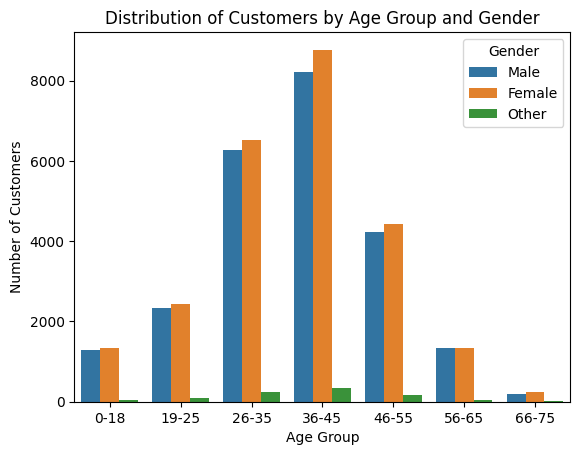

In [37]:
ECommerce_df["Age_Group"] = pd.cut(
    ECommerce_df["Age"],
    bins = [0, 18, 25, 35, 45, 55, 65, 75],
    labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75"]
)

sns.countplot(
    ECommerce_df,
    x = "Age_Group",
    hue = "Gender"
)

plt.title("Distribution of Customers by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

**Conclusion:**

From the distribution of customers by age group and gender, the majority of customers are aged 36 to 45, with females dominating. Even in other age groups, females still dominate, indicating that the shopping activity level of females is generally higher than males. The age group with the fewest transactions is 66–75, which might be due to lower online shopping adoption or less interest in digital platforms. Therefore, my suggested solution is to provide targeted support and simplified shopping options for older customers to increase their engagement.

**Which countries or cities have the highest number of customers?**

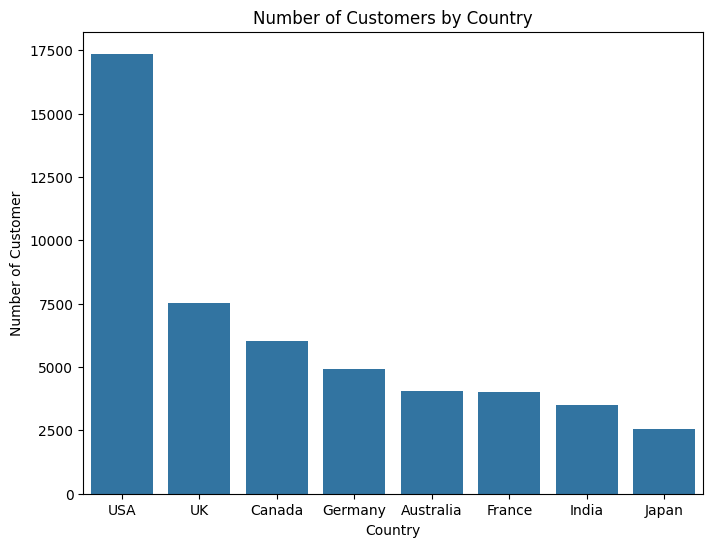

In [38]:
plt.figure(figsize = (8, 6))
sns.countplot(
    data = ECommerce_df,
    x = "Country",
    order = ECommerce_df["Country"].value_counts().index
)

plt.title("Number of Customers by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customer")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

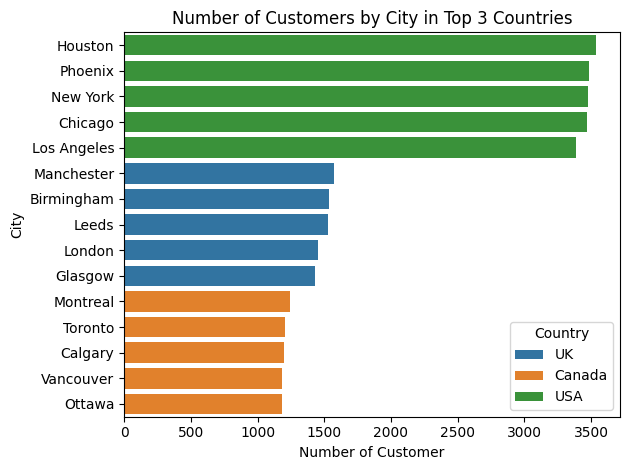

In [39]:
top_3_countries = ECommerce_df["Country"].value_counts().nlargest(3).index
filtered_df = ECommerce_df[ECommerce_df["Country"].isin(top_3_countries)]

sns.countplot(
    data = filtered_df,
    y = "City",
    hue = "Country",
    order = filtered_df["City"].value_counts().index
)

plt.title("Number of Customers by City in Top 3 Countries")
plt.xlabel("Number of Customer")
plt.ylabel("City")
plt.legend(title = "Country")
plt.tight_layout()
plt.show

**Conclusion:**

The USA has a significantly higher number of customers compared to the other seven countries, indicating that it is the company’s primary market. Japan has the fewest customers, which may be due to lower market penetration or different shopping preferences. To gain deeper insight, cities within the top three countries were analyzed, showing that Houston has the highest number of customers. This suggests that Houston is a key customer hub. Therefore, the proposed solution is to strengthen marketing strategies in high-performing cities while exploring targeted campaigns to improve engagement in underperforming markets.

**Is there a relationship between login frequency and average session duration?**

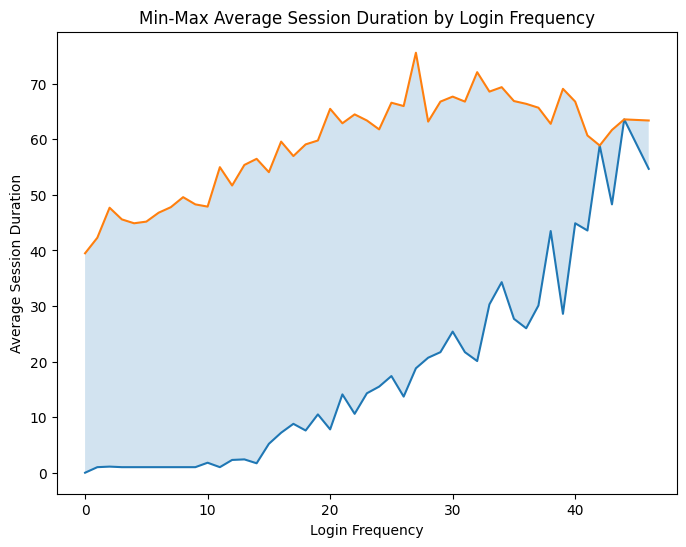

In [40]:
agg_df1 = (
    ECommerce_df
    .groupby("Login_Frequency")["Session_Duration_Avg"]
    .agg(["min", "max"])
    .reset_index()
)

plt.figure(figsize = (8, 6))
plt.plot(agg_df1["Login_Frequency"], agg_df1["min"], label = "Min Session Duration")
plt.plot(agg_df1["Login_Frequency"], agg_df1["max"], label = "Max Session Duration")

plt.fill_between(
    agg_df1["Login_Frequency"],
    agg_df1["min"],
    agg_df1["max"],
    alpha = 0.2
)

plt.title("Min-Max Average Session Duration by Login Frequency")
plt.xlabel("Login Frequency")
plt.ylabel("Average Session Duration")
plt.show()

**Conclusion:**

I visualized the minimum and maximum average session duration to observe whether higher login frequency is associated with longer session duration, using only min–max values to reduce visual clutter and highlight the overall range of behavior. The results show that as login frequency increases, the average session duration also tends to increase. When login frequency is 0, the maximum average session duration reaches around 40, which may occur because some users stay logged in for a long time during a single session. Overall, this visualization indicates a positive relationship between login frequency and customer engagement.


**How does age relate to mobile app usage?**

/tmp/ipython-input-1516493396.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ECommerce_df.groupby("Age_Group")["Mobile_App_Usage"]


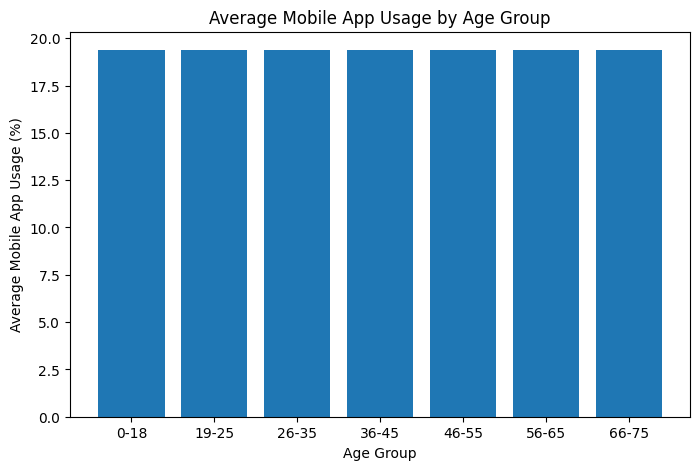

In [41]:
age_usage = (
    ECommerce_df.groupby("Age_Group")["Mobile_App_Usage"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 5))
plt.bar(age_usage["Age_Group"], age_usage["Mobile_App_Usage"])

plt.title("Average Mobile App Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Mobile App Usage (%)")
plt.show()


**Conclusion:**

The average mobile app usage is relatively similar across all age groups. This suggests that mobile applications are widely adopted across different ages, and age alone does not significantly influence mobile app usage behavior.

**Which age groups tend to have the highest total purchases?**

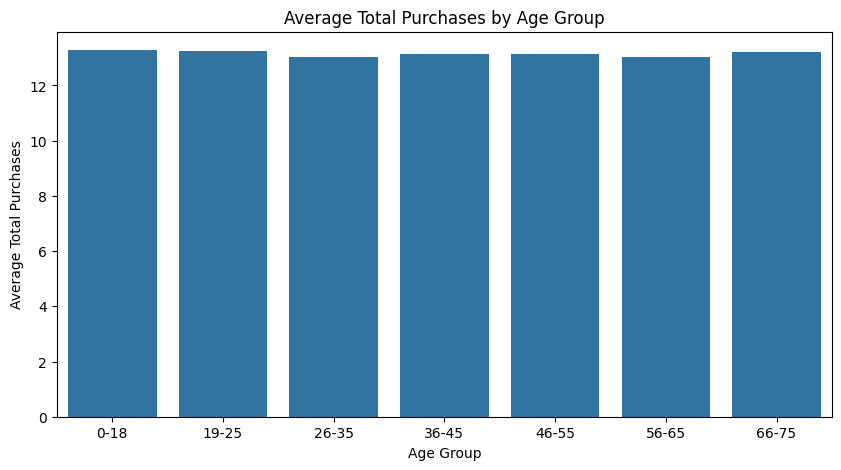

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data = ECommerce_df,
    x = "Age_Group",
    y = "Total_Purchases",
    estimator = np.mean,
    errorbar = None
)

plt.title("Average Total Purchases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Purchases")
plt.show()


**Conclusion:**

The average total purchases are relatively similar across all age groups, with no age group standing out significantly. This indicates that purchasing activity is fairly consistent regardless of age.

**Which age groups use discounts most frequently?**

/tmp/ipython-input-3189068484.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Age_Group")["Discount_Usage_Rate"]


Text(0, 0.5, 'Discount Usage Rate')

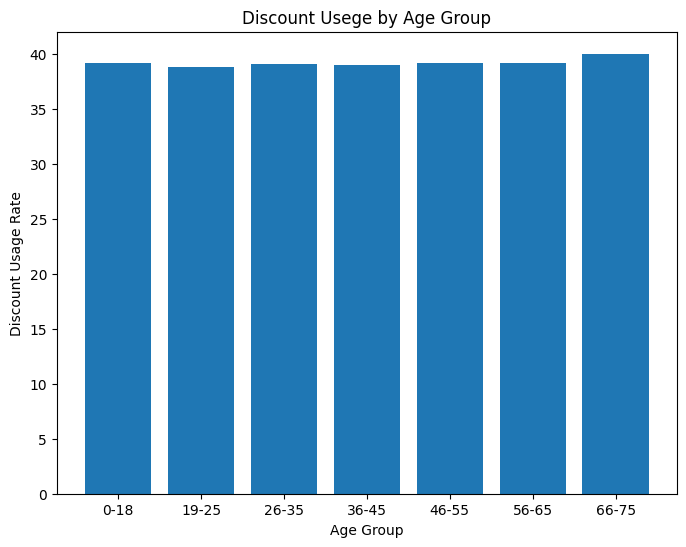

In [42]:
discount_by_age = (
    ECommerce_df
    .groupby("Age_Group")["Discount_Usage_Rate"]
    .mean()
    .reset_index()
)

plt.figure(figsize = (8, 6))
plt.bar(discount_by_age["Age_Group"], discount_by_age["Discount_Usage_Rate"])

plt.title("Discount Usege by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Discount Usage Rate")

**Conclusion:**

Discount usage is almost the same across all age groups, with no significant differences. This means age does not strongly affect how often customers use discounts, and discounts are used evenly by customers of all ages.

**Does higher total purchase lead to higher discount usage?**

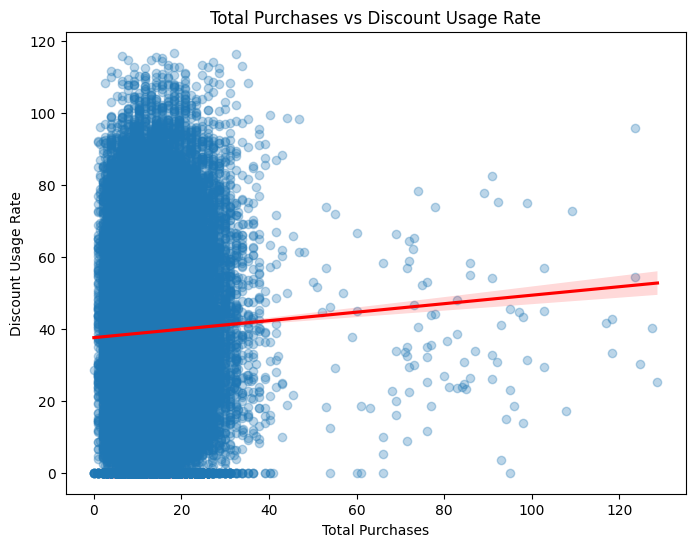

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=ECommerce_df,
    x="Total_Purchases",
    y="Discount_Usage_Rate",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.title("Total Purchases vs Discount Usage Rate")
plt.xlabel("Total Purchases")
plt.ylabel("Discount Usage Rate")
plt.show()


**Conclusion:**

Based on my analysis, there is a weak positive relationship between total purchases and discount usage rate. Customers with lower total purchases tend to use discounts slightly more often, which may indicate a marketing strategy aimed at attracting less active customers to increase their purchasing activity.

Meanwhile, customers with higher total purchases seem to rely less on discounts. This suggests that frequent or loyal customers do not strongly depend on discounts, as they already have a higher intention to purchase.

**Do customers who log in less frequently have a higher chance of churn?**

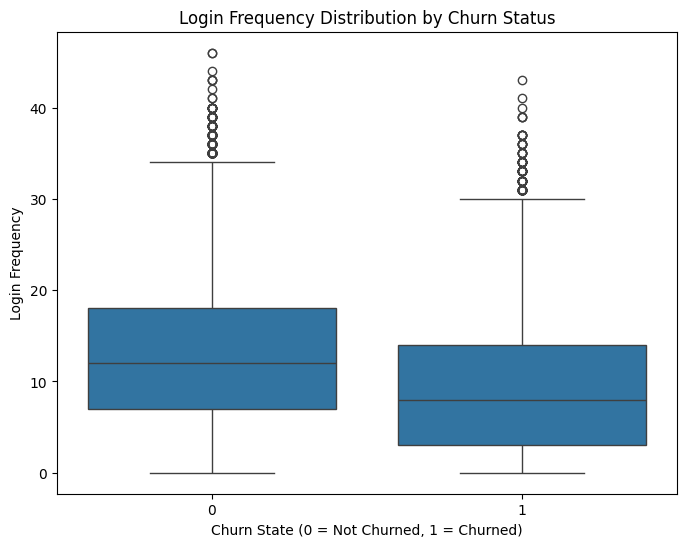

In [44]:
plt.figure(figsize = (8, 6))
sns.boxplot(
    data = ECommerce_df,
    x = "Churned",
    y = "Login_Frequency"
)

plt.title("Login Frequency Distribution by Churn Status")
plt.xlabel("Churn State (0 = Not Churned, 1 = Churned)")
plt.ylabel("Login Frequency")
plt.show()

**Conclusion:**

The boxplot shows that churned customers have a lower median login frequency compared to non-churned customers. This suggests that customers who log in less frequently are more likely to churn, highlighting login frequency as an important indicator of customer engagement and retention. This result can be used as an evaluation metric to design strategies that encourage more frequent logins, such as personalized notifications, reminders, or engagement-driven features, as well as offering more attractive discounts and appealing products, in order to reduce customer churn.

**Do customers with fewer purchases have a higher chance of churn?**

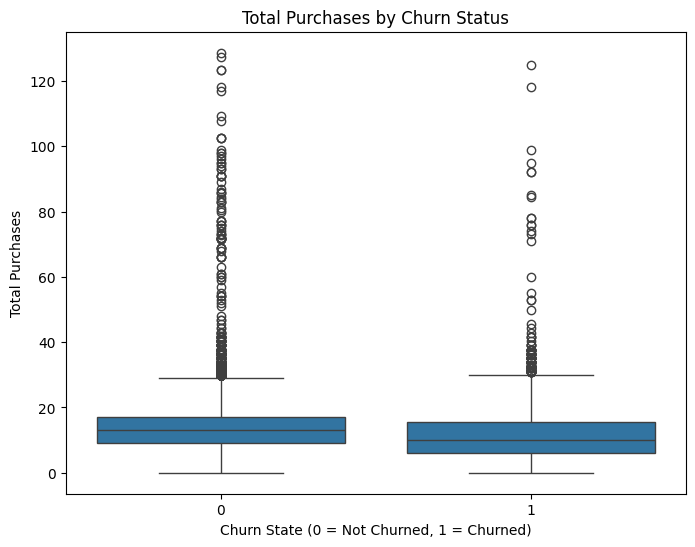

In [45]:
plt.figure(figsize = (8, 6))
sns.boxplot(
    data = ECommerce_df,
    x = "Churned",
    y = "Total_Purchases"
)

plt.title("Total Purchases by Churn Status")
plt.xlabel("Churn State (0 = Not Churned, 1 = Churned)")
plt.ylabel("Total Purchases")
plt.show()

**Conclusion:**

Customers with low purchase frequency represent a higher churn risk, as they tend to show lower engagement compared to customers with more frequent purchases. This indicates that total purchases can serve as an important indicator of customer loyalty, where customers who purchase more often are more likely to remain active. Therefore, encouraging repeat purchases through targeted promotions or loyalty programs may help reduce customer churn.

**Do customers with longer days since their last purchase have a higher chance of churning?**

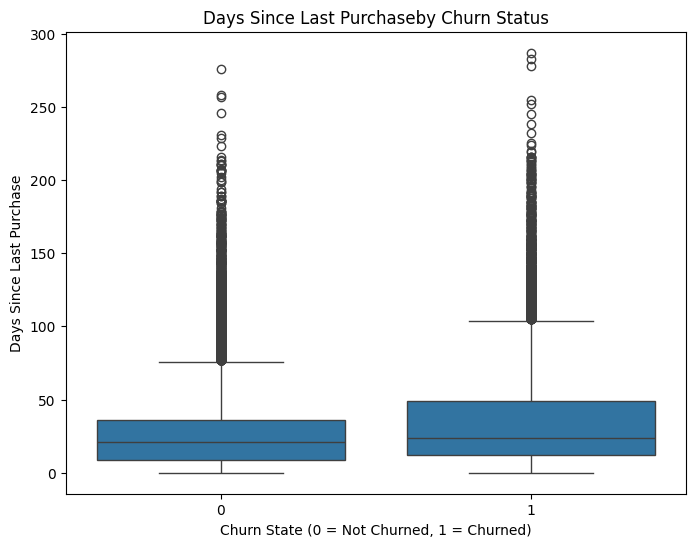

In [49]:
plt.figure(figsize = (8, 6))
sns.boxplot(
    data = ECommerce_df,
    x = "Churned",
    y = "Days_Since_Last_Purchase"
)

plt.title("Days Since Last Purchase by Churn Status")
plt.xlabel("Churn State (0 = Not Churned, 1 = Churned)")
plt.ylabel("Days Since Last Purchase")
plt.show()

**Conclusion:**

Churned customers have a higher number of days since their last purchase compared to non-churned customers. This indicates that customers who have not made a purchase for a longer time are more likely to churn.

##**FINAL CONCLUSION:**

Based on the overall data analysis, the majority of customers fall within the 36–45 age group and are predominantly female. This may be due to the fact that individuals in this age range are generally more financially stable, actively shopping for household or personal needs, and familiar with digital platforms. The dominance of female customers is also consistent with real-world shopping behavior, where females tend to be more active in online purchasing. In contrast, the smallest customer segment comes from the 66–75 age group, which may indicate lower adoption of online shopping or less engagement with digital technology among older users.

However, when analyzing the **average total purchases by age group**, all age groups show very similar average values. This suggests that although the 36–45 age group has the largest number of customers, their purchase quantity per customer is not significantly higher than other age groups. This may indicate that customers in the dominant age group tend to make smaller or more moderate purchases, while customers in other age groups make purchases less frequently but in comparable amounts. As a result, the average total purchases across age groups remain relatively consistent.

A similar pattern is observed in **average mobile app usage by age group**, where usage levels are nearly the same across all ages. This indicates that mobile applications are widely adopted regardless of age, and age alone does not strongly influence mobile app usage behavior. The same applies to **discount usage**, where all age groups show almost identical average discount usage rates. This suggests that discount usage is not age-driven and that customers across all age groups respond similarly to promotional offers.

From a geographical perspective, among the eight countries in the dataset, the **United States has the highest number of customers**, making it the company’s primary market. This may be driven by stronger market penetration, higher purchasing power, or more effective marketing strategies. Further analysis of cities within the top-performing countries shows that certain cities, such as Houston, act as major customer hubs. This highlights the importance of location-based performance and suggests that customer distribution varies more by region than by age.

When examining **login frequency and average session duration using a min–max approach**, a clear pattern emerges: customers with lower login frequency tend to have shorter average session durations, while customers who log in more frequently tend to spend more time per session. This indicates a positive relationship between login frequency and user engagement, where frequent logins reflect higher interest and interaction with the platform.

The relationship between **total purchases and discount usage** shows a weak positive trend. Customers with lower total purchases tend to use discounts slightly more often, which may indicate a marketing strategy aimed at encouraging less active customers to increase their purchasing activity. On the other hand, customers with higher total purchases appear to rely less on discounts, suggesting that loyal or frequent customers have a stronger purchase intention and are less price-sensitive.

Finally, the **churn analysis** provides important insights into customer retention. The boxplot shows that churned customers have a lower median login frequency compared to non-churned customers, indicating that customers who log in less frequently are more likely to churn. In addition, customers with low purchase frequency also represent a higher churn risk, as they tend to be less engaged overall. These findings highlight login frequency and total purchases as key indicators of customer engagement, loyalty, and retention.

## **RECOMMENDATIONS:**

1. **Increase customer engagement by encouraging more frequent logins**

Customers who log in more often tend to stay longer on the platform and are less likely to churn. Sending personalized notifications, reminders, or highlighting new features can motivate customers to return more frequently and maintain their engagement.

2. **Apply discounts strategically to less active customers**

The analysis shows that customers with lower total purchases tend to use discounts more often. This suggests that discounts are more effective as a tool to encourage inactive or low-engagement customers, rather than offering large discounts to already loyal customers who are less price-sensitive.

3. **Strengthen loyalty programs for frequent buyers**

Customers with higher purchase frequency are less likely to churn and do not strongly depend on discounts. Rewarding them with loyalty points, exclusive offers, or early access to products can help maintain long-term retention and increase customer lifetime value.

4. **Focus marketing efforts on high-performing regions and cities**

Countries and cities with a high number of customers, such as the USA and major customer hubs, contribute significantly to overall performance. Strengthening campaigns in these areas can maximize returns, while targeted and localized strategies can be used to grow customer bases in underperforming regions.

5. **Provide additional support for older customers**

Older age groups show lower participation levels, possibly due to lower familiarity with digital platforms. Offering simplified user interfaces, clearer instructions, and customer support can help increase their comfort and engagement with the platform.

## MACHINE LEARNING

In [54]:
# Separate features and target
X = ECommerce_df.drop(columns = ["Churned", "Age_Group"])
y = ECommerce_df["Churned"]

In [57]:
#Identification Data Types
categorical_features = [
    "Gender",
    "Country",
    "City",
    "Signup_Quarter",
]

numerical_features = [
    'Age',
    'Membership_Years',
    'Login_Frequency',
    'Session_Duration_Avg',
    'Pages_Per_Session',
    'Cart_Abandonment_Rate',
    'Wishlist_Items',
    'Total_Purchases',
    'Average_Order_Value',
    'Days_Since_Last_Purchase',
    'Discount_Usage_Rate',
    'Returns_Rate',
    'Email_Open_Rate',
    'Customer_Service_Calls',
    'Product_Reviews_Written',
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Payment_Method_Diversity',
    'Lifetime_Value',
    'Credit_Balance',
    "Returned_Items_Count"
]

In [63]:
#Preprocessing (Scaling and Encoder)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers = [
        #Scaling Numerical Features
        ("numerical", StandardScaler(), numerical_features),

        #Encoder Categorical Features
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ]
)

In [64]:
#Split Dataset Into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42, stratify = y)

## LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)

In [72]:
#Pipeline
pipeline = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", log_reg)
])

In [73]:
#Model Train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'Membership_Years',
                                                   'Login_Frequency',
                                                   'Session_Duration_Avg',
                                                   'Pages_Per_Session',
                                                   'Cart_Abandonment_Rate',
                                                   'Wishlist_Items',
                                                   'Total_Purchases',
                                                   'Average_Order_Value',
                                                   'Days_Since_Last_Purchase',
                                                   'Discount_Usage_Rate',
                                                   'Returns_Rate',
                                                   'Email_Open_Rate',
                                                   'Customer_Service_Calls',
                                                   'Product_Reviews_Written',
                                                   'Social_Media_Engagement_Score',
                                                   'Mobile_App_Usage',
                                                   'Payment_Method_Diversity',
                                                   'Lifetime_Value',
                                                   'Credit_Balance',
                                                   'Returned_Items_Count']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Country', 'City',
                                                   'Signup_Quarter'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [75]:
y_pred_logreg = pipeline.predict(X_test)
y_proba_logreg = pipeline.predict_proba(X_test)[:, 1]

In [79]:
#Metrics Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [82]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))
print("Recall Score:", recall_score(y_test, y_pred_logreg))
print("Precision Score:", precision_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_logreg))

Accuracy Score: 0.7798024295821653
Recall Score: 0.4224376731301939
Precision Score: 0.6966121050628092
F1 Score: 0.5259376347176319
ROC AUC Score: 0.788305285700042


In [85]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9853,  797],
       [2502, 1830]])

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10650
           1       0.70      0.42      0.53      4332

    accuracy                           0.78     14982
   macro avg       0.75      0.67      0.69     14982
weighted avg       0.77      0.78      0.76     14982



In [101]:
#Hyperparameter Tuning (GridSearch)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv = 5,
    scoring = 'roc_auc',
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

best_param_logreg = grid_search.best_params_
print("Best Parameters:", best_param_logreg)

Best Parameters: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [102]:
#Model Evaluation After Tuning
best_model_logreg = grid_search.best_estimator_

y_pred_best_logreg = best_model_logreg.predict(X_test)
y_prob_best_logreg = best_model_logreg.predict_proba(X_test)[:, 1]

print("ROC-AUC (Tuned):", roc_auc_score(y_test, y_prob_best_logreg))

print(classification_report(y_test, y_pred_best_logreg))

ROC-AUC (Tuned): 0.7889261918076635
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10650
           1       0.70      0.42      0.53      4332

    accuracy                           0.78     14982
   macro avg       0.75      0.67      0.69     14982
weighted avg       0.77      0.78      0.76     14982



Hyperparameter tuning using GridSearchCV did not result in a significant improvement in performance metrics. This indicates that the baseline Logistic Regression model was already well-optimized for the dataset.

## RANDOM FOREST

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    class_weight = "balanced"
)

In [107]:
pipeline_rf = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("model", rf)
]
)

In [108]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'Membership_Years',
                                                   'Login_Frequency',
                                                   'Session_Duration_Avg',
                                                   'Pages_Per_Session',
                                                   'Cart_Abandonment_Rate',
                                                   'Wishlist_Items',
                                                   'Total_Purchases',
                                                   'Average_Order_Value',
                                                   'Days_Since_Last_Purchase',
                                                   'Discount_Usage_Rate',
                                                   'Returns_Rate',
                                                   'Email_Open_Rate',
                                                   'Cust...e_Calls',
                                                   'Product_Reviews_Written',
                                                   'Social_Media_Engagement_Score',
                                                   'Mobile_App_Usage',
                                                   'Payment_Method_Diversity',
                                                   'Lifetime_Value',
                                                   'Credit_Balance',
                                                   'Returned_Items_Count']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Country', 'City',
                                                   'Signup_Quarter'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [109]:
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

In [110]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Recall Score:", recall_score(y_test, y_pred_rf))
print("Precision Score:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC ROC Score:", roc_auc_score(y_test, y_pred_rf))

Accuracy Score: 0.9068215191563209
Recall Score: 0.7486149584487535
Precision Score: 0.9135211267605634
F1 Score: 0.8228875919817306
AUC ROC Score: 0.8598943336844708


In [112]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[10343,   307],
       [ 1089,  3243]])

In [113]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     10650
           1       0.91      0.75      0.82      4332

    accuracy                           0.91     14982
   macro avg       0.91      0.86      0.88     14982
weighted avg       0.91      0.91      0.90     14982



In [117]:
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv = 5,
    scoring = "roc_auc",
    n_jobs = -1
)

grid_search_rf.fit(X_train, y_train)

best_param_rf = grid_search_rf.best_params_
print("Best Parameter:", best_param_rf)


Best Parameter: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [119]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)
y_proba_best_rf = best_model_rf.predict_proba(X_test)[:, 1]

print("ROC-AUC Score (Tuned)", roc_auc_score(y_test, y_proba_best_rf))
print(classification_report(y_test, y_pred_best_rf))

ROC-AUC Score (Tuned) 0.9212987311372081
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10650
           1       0.90      0.78      0.83      4332

    accuracy                           0.91     14982
   macro avg       0.91      0.87      0.89     14982
weighted avg       0.91      0.91      0.91     14982



In [130]:
new_customer = pd.DataFrame([{
    'Age': 35,
    'Gender': 'Male',
    'Country': 'Indonesia',
    'City': 'Jakarta',
    'Membership_Years': 3,
    'Login_Frequency': 5,
    'Session_Duration_Avg': 12,
    'Pages_Per_Session': 6,
    'Cart_Abandonment_Rate': 0.4,
    'Wishlist_Items': 2,
    'Total_Purchases': 8,
    'Average_Order_Value': 250000,
    'Days_Since_Last_Purchase': 45,
    'Discount_Usage_Rate': 0.3,
    'Returns_Rate': 0.1,
    'Email_Open_Rate': 0.4,
    'Customer_Service_Calls': 1,
    'Product_Reviews_Written': 2,
    'Social_Media_Engagement_Score': 60,
    'Mobile_App_Usage': 0.7,
    'Payment_Method_Diversity': 2,
    'Lifetime_Value': 2000000,
    'Credit_Balance': 50000,
    'Signup_Quarter': 'Q2',
    'Returned_Items_Count': 0.1
}])

not_churn_prob = best_model_rf.predict_proba(new_customer)[0, 1]
not_churn_pred = best_model_rf.predict(new_customer)[0]

print("Churn Probability:", not_churn_prob)
print("Prediction:", "Churn" if not_churn_pred == 1 else "Not Churn")


Churn Probability: 0.3361434417432132
Prediction: Not Churn


In [132]:
new_customer_churn = pd.DataFrame([{
    'Age': 28,
    'Gender': 'Female',
    'Country': 'Indonesia',
    'City': 'Bandung',
    'Membership_Years': 0.5,
    'Login_Frequency': 1,
    'Session_Duration_Avg': 3,
    'Pages_Per_Session': 2,
    'Cart_Abandonment_Rate': 0.8,
    'Wishlist_Items': 0,
    'Total_Purchases': 1,
    'Average_Order_Value': 120000,
    'Days_Since_Last_Purchase': 150,
    'Discount_Usage_Rate': 0.9,
    'Returns_Rate': 0.4,
    'Email_Open_Rate': 0.05,
    'Customer_Service_Calls': 4,
    'Product_Reviews_Written': 0,
    'Social_Media_Engagement_Score': 10,
    'Mobile_App_Usage': 0.2,
    'Payment_Method_Diversity': 1,
    'Lifetime_Value': 120000,
    'Credit_Balance': 0,
    'Signup_Quarter': 'Q4',
    'Returned_Items_Count': 1
}])

churn_prob = best_model_rf.predict_proba(new_customer_churn)[0, 1]
churn_pred = best_model_rf.predict(new_customer_churn)[0]

print("Churn Probability:", churn_prob)
print("Prediction:", "Churn" if churn_pred == 1 else "Not Churn")



Churn Probability: 0.5295747443044614
Prediction: Churn


**Conclusion:**

The Random Forest model shows strong performance in predicting customer churn. Before hyperparameter tuning, the model already achieved high accuracy (90.7%) with good precision and recall, indicating a reliable baseline model.

After hyperparameter tuning, the overall accuracy remained stable, but the ROC-AUC score improved significantly from 0.86 to 0.92, showing better ability to distinguish between churned and non-churned customers. Additionally, recall for churned customers increased, meaning the tuned model is more effective at identifying customers who are likely to churn.

Overall, hyperparameter tuning enhanced the model’s discrimination power without sacrificing stability, making the tuned Random Forest model more suitable for churn prediction and business decision-making.